In [1]:
from umap import UMAP
from sklearn.manifold import TSNE, MDS
from sklearn.metrics.pairwise import manhattan_distances

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_SEED = 3637

### Section 1 Load and prep the Data 

In [3]:
# get Data
train_df = pd.read_json('Twibot-20/data_creation/train_final_dataset.json')

sentement_dict = {
    'Positive': 1,
    'Negative': 0
}

train_df['sentiment'] = train_df['sentiment'].apply(lambda x: sentement_dict[x])

X = train_df.drop(['ID', 'profile', 'tweet', 'neighbor', 'domain', 'label', 'topic_dist'], axis=1)
X.fillna(0, inplace=True)
y = train_df.loc[:, 'label']
X.sample(5)

,nn_signal,lang_count,tweet_min_len,tweet_max_len,tweet_av_len,tweet_len_std,user_name_len,screen_name_len,user_name_chars,protected,...,sentiment,similarity,num_mentions,num_links,retweet,num_tweets,topic_skew,topic_kurtosis,topic_gini,topic_std
6433,0.591510,2,34,145,116.790000,31.749739,6,10,6,0,...,1,0.635410,1.080000,0.360000,0.945000,200,1.390086,0.600388,0.709461,0.186642
95,0.654252,3,10,344,95.153061,43.890251,19,12,12,0,...,1,0.729095,1.362245,0.255102,0.112245,196,0.217802,-1.400580,0.477618,0.270097
7349,0.933259,4,34,149,121.355330,27.912038,5,9,4,0,...,0,0.818659,1.187817,0.116751,0.959391,197,-0.025268,-1.250869,0.358172,0.295370
5622,0.302323,3,74,131,84.350000,8.203505,7,14,6,0,...,0,0.894441,0.000000,1.000000,0.000000,200,0.889950,-0.489683,0.513234,0.087127
2493,0.801576,2,17,269,95.459596,47.459136,7,9,7,0,...,1,0.594363,1.555556,0.338384,0.227273,198,0.345922,-1.418084,0.517322,0.320440


### Section 2 Plots Using Unsupervised Dimensionality Reduction

#### Section 2.1 Multidimensional Scaling (MDS)

In [4]:
# MDS Preserves distance
def plot_mds(X, use_manhatten=False, random_state=None):
    if use_manhatten:
        X = manhattan_distances(X)
        distance = 'Manhattan'
        mds_feats = MDS(dissimilarity='precomputed', random_state=random_state).fit_transform(X)
    else:
        mds_feats = MDS(random_state=random_state).fit_transform(X)
        distance = 'Euclidean'
    
    mds_dataframe = pd.concat([pd.DataFrame(mds_feats), pd.Series(y)], axis=1, ignore_index=True)
    mds_dataframe.columns = ['First MDS Feature', 'Second MDS Feature', 'Label']

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x='First MDS Feature', y='Second MDS Feature', hue='Label', data=mds_dataframe, ax=ax)
    ax.set_title(f'Multidimensional Scaling using {distance} distance')

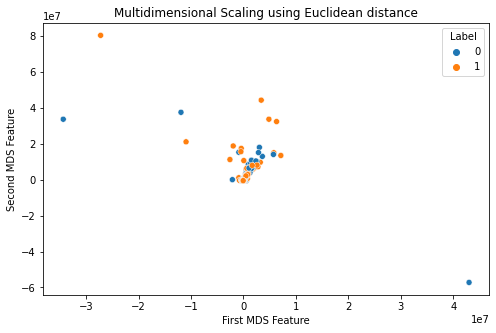

In [5]:
mds_X = X.sample(2000, random_state=RANDOM_SEED)
plot_mds(mds_X, use_manhatten=False, random_state=RANDOM_SEED)

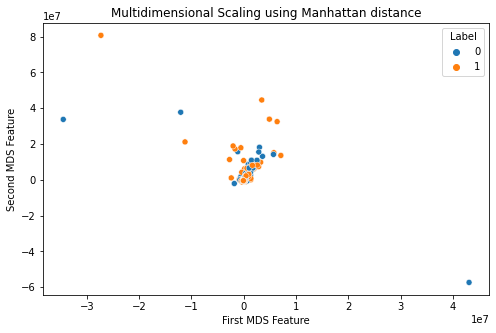

In [6]:
plot_mds(mds_X, use_manhatten=True, random_state=RANDOM_SEED)

#### Section 2.2 t-distributed Stochastic Neighbor Embedding (t-SNE)

In [12]:
# t-SNEE preserves local distance not global distance thus should only be used for visualization
# does not preserve cluster separation or density
def plot_tsne(X, y, perplexity=30.0, ax=None, random_state=None):
    tsne_feats = TSNE(perplexity=perplexity, random_state=random_state).fit_transform(X)
    tsne_dataframe = pd.concat([pd.DataFrame(tsne_feats), pd.Series(y)], axis=1, ignore_index=True)
    tsne_dataframe.columns = ['First t-SNE Feature', 'Second t-SNE Feature', 'Label']

    ax = sns.scatterplot(x='First t-SNE Feature', y='Second t-SNE Feature', hue='Label', data=tsne_dataframe, ax=ax)
    ax.set_title(f't-distributed Stochastic Neighbor Embedding\nwith perplexity={perplexity}')

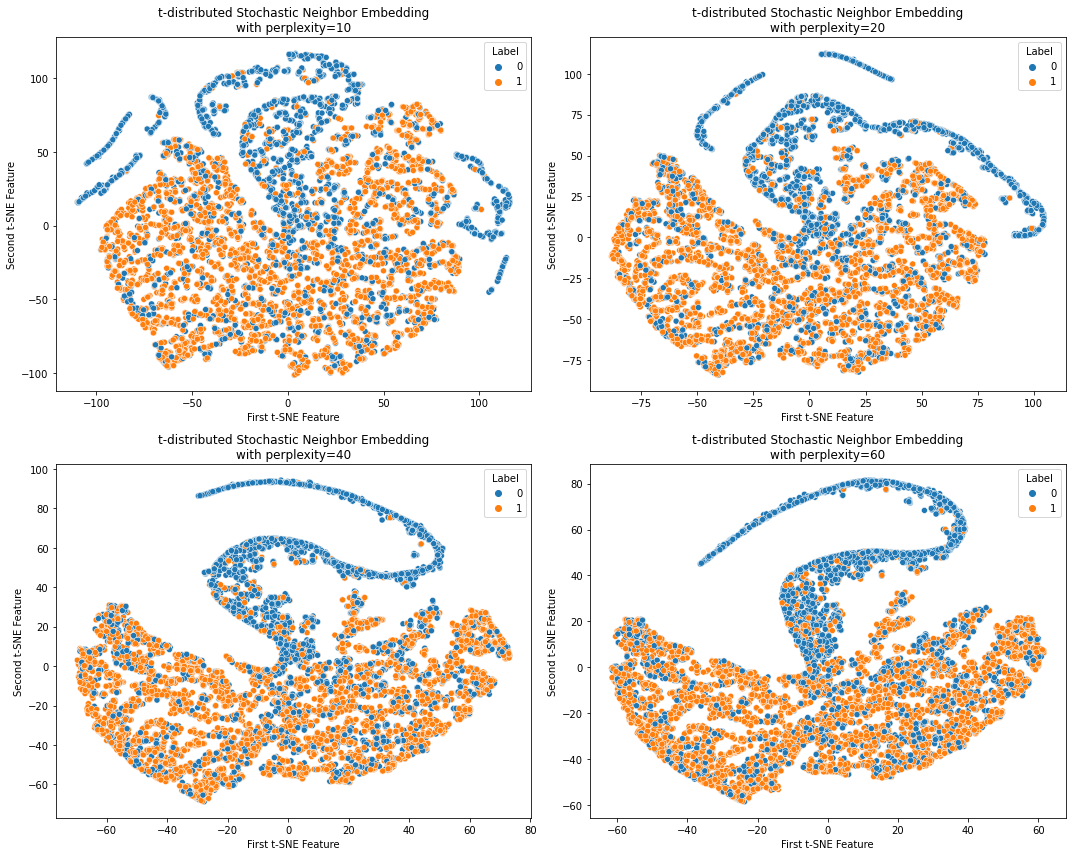

In [16]:
perplexity = [10, 20, 40, 60]


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for index, ax in enumerate(axes.flatten()):
    plot_tsne(X, y, perplexity=perplexity[index], ax=ax, random_state=RANDOM_SEED)
plt.tight_layout()

#### Section 2.3 Uniform Manifold Approximation and Projection (UMAP)

In [9]:
# Umap appropriate for both visualization and dimensionality reduction 
# preserves local structure and better than t-SNEE at preserving global structure
def plot_umap(X, y, random_state=None):
    umap_feats = UMAP(random_state=random_state).fit_transform(X)
    umap_dataframe = pd.concat([pd.DataFrame(umap_feats), pd.Series(y)], axis=1, ignore_index=True)
    umap_dataframe.columns = ['First UMAP Feature', 'Second UMAP Feature', 'Label']

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(x='First UMAP Feature', y='Second UMAP Feature', hue='Label', data=umap_dataframe, ax=ax)
    ax.set_title('Uniform Manifold Approximation and Projection')

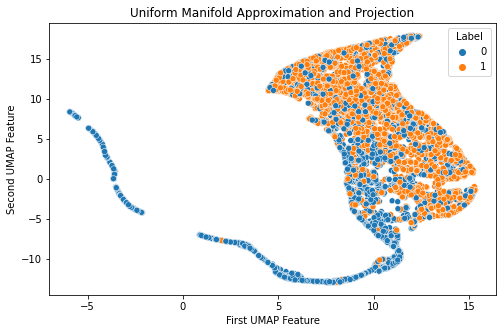

In [10]:
plot_umap(X, y, random_state=RANDOM_SEED)